In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api


In [3]:
# 1st step Load the data
findata = pd.read_excel("Data-Financial.xlsx",sheet_name = None)

In [4]:
print(findata)

{'CashFlow_St':                                                  Type  \
0   Cash and Cash equivalents at the start of the ...   
1   Cash and Cash equivalents at the start of the ...   
2                Cash flows from Operating Activities   
3                Cash flows from Operating Activities   
4                Cash flows from Operating Activities   
..                                                ...   
61                Cashflows from Financing Activities   
62                Cashflows from Financing Activities   
63                Cashflows from Financing Activities   
64   Cash and Cash equivalents at the end of the year   
65   Cash and Cash equivalents at the end of the year   

                        Subtype         Account      SubAccount  \
0        Cash and Bank at start    Cash at bank    Cash at bank   
1        Cash and Bank at start    Cash in hand    Cash in hand   
2             Profit before tax           Sales           Sales   
3             Profit before tax

In [5]:
#2nd step explore the data

#1)
cashflow_data = findata['CashFlow_St']
cashflow_data

,Type,Subtype,Account,SubAccount,ValueType,Account_Key,Sort on Type,Sort on SubType,Unnamed: 8,Unnamed: 9,Column3
0,Cash and Cash equivalents at the start of the ...,Cash and Bank at start,Cash at bank,Cash at bank,Opening_balance,10,1,1,NaN,NaN,NaN
1,Cash and Cash equivalents at the start of the ...,Cash and Bank at start,Cash in hand,Cash in hand,Opening_balance,20,1,1,NaN,NaN,NaN
2,Cash flows from Operating Activities,Profit before tax,Sales,Sales,All_FTP,210,2,2,NaN,NaN,NaN
3,Cash flows from Operating Activities,Profit before tax,Sales,Sales Return,All_FTP,220,2,2,NaN,NaN,NaN
4,Cash flows from Operating Activities,Profit before tax,Cost of Sales,Cost of Sales,All_FTP,230,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61,Cashflows from Financing Activities,Repayment of Long term loan,Long term loan,Long term loan,All_FTP_Negative,160,4,15,NaN,NaN,NaN
62,Cashflows from Financing Activities,Repayment of Long term loan,Long term loan,Long term loan,All_FTP_Negative,170,4,15,NaN,NaN,NaN
63,Cashflows from Financing Activities,Dividends paid,Dividends,Dividends,All_FTP_Negative,135,4,16,NaN,NaN,NaN
64,Cash and Cash equivalents at the end of the year,Cash and Bank at end,Cash at bank,Cash at bank,Closing_balance,10,5,17,NaN,NaN,NaN


In [6]:
#2)
balance_data = findata['SoCE_St']
balance_data

,Type,Account,Balancetype,AccountKey,Sort by type,Sort by Account
0,Balance at the beginning,Share Capital,Opening_balance,180.0,1.0,1.0
1,Balance at the beginning,Share Premium,Opening_balance,190.0,1.0,2.0
2,Balance at the beginning,Retained Earnings,Opening_balance,200.0,1.0,3.0
3,Balance at the beginning,Dividends paid,Opening_balance,201.0,1.0,4.0
4,Changes in accounting policy,Retained Earnings,ToBeDefined,200.0,2.0,3.0
5,Dividends,Dividends paid,FTP_negative,201.0,3.0,4.0
6,Total income for the year,Retained Earnings,FTP,200.0,4.0,3.0
7,Issue of share capital,Share Capital,FTP_positive,180.0,5.0,1.0
8,Issue of share capital,Share Premium,FTP_positive,190.0,5.0,2.0
9,Balance at the end,Share Capital,Closing_balance,180.0,6.0,1.0


In [7]:
#3)
#Accesing seperate sheets
gl_data = findata['GL']
gl_data

,Index,Date,Territory_key,Account_key,Details,Amount
0,1.1,2018-01-01,1,230,Cost of Sales,-884
1,1.2,2018-01-01,1,60,Cost of Sales,-884
2,2.1,2018-01-01,1,230,Cost of Sales,-1120
3,2.2,2018-01-01,1,60,Cost of Sales,-1120
4,3.1,2018-01-01,1,280,Credit Expenses,-2394
...,...,...,...,...,...,...
27904,1758.2,2020-08-31,7,1010,Transfer of Net Profit to Retained Earnings,-60532
27905,1815.2,2020-09-30,7,1010,Transfer of Net Profit to Retained Earnings,-59706
27906,1875.2,2020-10-31,7,1010,Transfer of Net Profit to Retained Earnings,-67964
27907,1937.2,2020-11-30,7,1010,Transfer of Net Profit to Retained Earnings,-101318


In [8]:
#4)
accounts_data = findata['Chart of Accounts']
accounts_data

,Account_key,Report,Class,SubClass,SubClass2,Account,SubAccount
0,10,Balance Sheet,Assets,Assets,Current Assets,Cash & Cash Equivalents,Cash at Bank
1,20,Balance Sheet,Assets,Assets,Current Assets,Cash & Cash Equivalents,Cash in hand
2,30,Balance Sheet,Assets,Assets,Current Assets,Receivables,Trade Receivables
3,40,Balance Sheet,Assets,Assets,Current Assets,Receivables,Other Receivables
4,41,Balance Sheet,Assets,Assets,Current Assets,Receivables,Interest Receivable
5,42,Balance Sheet,Assets,Assets,Current Assets,Receivables,Dividend Receivable
6,50,Balance Sheet,Assets,Assets,Current Assets,Receivables,Allowance for Bad Debt
7,60,Balance Sheet,Assets,Assets,Current Assets,Inventory,Inventory
8,70,Balance Sheet,Assets,Assets,Current Assets,Other Current Assets,Prepaid Expenses
9,75,Balance Sheet,Assets,Assets,Current Assets,Investments,Securities


In [9]:
#5)
territory_data = findata['Territory']
territory_data

,Territory_key,Country,Region
0,1,USA,North America
1,2,Canada,North America
2,3,UK,Europe
3,4,Germany,Europe
4,5,France,Europe
5,6,Australia,Oceania
6,7,New Zealand,Oceania


In [10]:
#6)
calendar_data = findata['Calendar']
calendar_data

,Date,Year,Quarter,Month,Day
0,2018-01-01,2018,Qtr 1,Jan,Mon
1,2018-01-02,2018,Qtr 1,Jan,Tue
2,2018-01-03,2018,Qtr 1,Jan,Wed
3,2018-01-04,2018,Qtr 1,Jan,Thu
4,2018-01-05,2018,Qtr 1,Jan,Fri
...,...,...,...,...,...
1091,2020-12-27,2020,Qtr 4,Dec,Sun
1092,2020-12-28,2020,Qtr 4,Dec,Mon
1093,2020-12-29,2020,Qtr 4,Dec,Tue
1094,2020-12-30,2020,Qtr 4,Dec,Wed


In [11]:
cashflow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             66 non-null     object 
 1   Subtype          66 non-null     object 
 2   Account          66 non-null     object 
 3   SubAccount       66 non-null     object 
 4   ValueType        66 non-null     object 
 5   Account_Key      66 non-null     int64  
 6   Sort on Type     66 non-null     int64  
 7   Sort on SubType  66 non-null     int64  
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Column3          0 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 5.8+ KB


In [12]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             13 non-null     object 
 1   Account          13 non-null     object 
 2   Balancetype      13 non-null     object 
 3   AccountKey       14 non-null     float64
 4   Sort by type     13 non-null     float64
 5   Sort by Account  13 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.6+ KB


In [13]:
gl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27909 entries, 0 to 27908
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          27909 non-null  float64       
 1   Date           27909 non-null  datetime64[ns]
 2   Territory_key  27909 non-null  int64         
 3   Account_key    27909 non-null  int64         
 4   Details        27909 non-null  object        
 5   Amount         27909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.3+ MB


In [14]:
accounts_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Account_key  54 non-null     int64 
 1   Report       54 non-null     object
 2   Class        54 non-null     object
 3   SubClass     54 non-null     object
 4   SubClass2    54 non-null     object
 5   Account      54 non-null     object
 6   SubAccount   54 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.1+ KB


In [15]:
territory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Territory_key  7 non-null      int64 
 1   Country        7 non-null      object
 2   Region         7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [16]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1096 non-null   datetime64[ns]
 1   Year     1096 non-null   int64         
 2   Quarter  1096 non-null   object        
 3   Month    1096 non-null   object        
 4   Day      1096 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 42.9+ KB


In [17]:
cashflow_data.describe()

,Account_Key,Sort on Type,Sort on SubType,Unnamed: 8,Unnamed: 9,Column3
count,66.000000,66.000000,66.000000,0.0,0.0,0.0
mean,249.833333,2.484848,6.000000,NaN,NaN,NaN
std,146.108556,0.845666,4.687135,NaN,NaN,NaN
min,10.000000,1.000000,1.000000,NaN,NaN,NaN
25%,112.500000,2.000000,2.000000,NaN,NaN,NaN
50%,265.000000,2.000000,4.000000,NaN,NaN,NaN
75%,390.000000,3.000000,9.000000,NaN,NaN,NaN
max,450.000000,5.000000,17.000000,NaN,NaN,NaN


In [18]:
balance_data.describe()

,AccountKey,Sort by type,Sort by Account
count,14.000000,13.000000,13.000000
mean,179.785714,3.615385,2.538462
std,51.289793,2.180920,1.126601
min,4.000000,1.000000,1.000000
25%,182.500000,1.000000,2.000000
50%,195.000000,4.000000,3.000000
75%,200.000000,6.000000,3.000000
max,201.000000,6.000000,4.000000


In [19]:
gl_data.describe()

,Index,Territory_key,Account_key,Amount
count,27909.000000,27909.000000,27909.000000,2.790900e+04
mean,995.992673,4.000000,144.533735,8.828694e+02
std,574.544811,2.000036,143.986797,2.705571e+04
min,1.100000,1.000000,10.000000,-1.092000e+06
25%,499.100000,2.000000,30.000000,-2.291000e+03
50%,995.200000,4.000000,120.000000,-5.280000e+02
75%,1493.200000,6.000000,230.000000,1.651000e+03
max,1992.300000,7.000000,1010.000000,1.092000e+06


In [20]:
accounts_data.describe()

,Account_key
count,54.000000
mean,232.000000
std,170.243222
min,10.000000
25%,112.500000
50%,205.500000
75%,337.500000
max,1010.000000


In [21]:
territory_data.describe()

,Territory_key
count,7.000000
mean,4.000000
std,2.160247
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,7.000000


In [22]:
calendar_data.describe()

,Year
count,1096.000000
mean,2019.000912
std,0.817055
min,2018.000000
25%,2018.000000
50%,2019.000000
75%,2020.000000
max,2020.000000


In [23]:
#3rd step handle missing values
#i) cashflow 
print(cashflow_data.isnull())


     Type  Subtype  Account  SubAccount  ValueType  Account_Key  Sort on Type  \
0   False    False    False       False      False        False         False   
1   False    False    False       False      False        False         False   
2   False    False    False       False      False        False         False   
3   False    False    False       False      False        False         False   
4   False    False    False       False      False        False         False   
..    ...      ...      ...         ...        ...          ...           ...   
61  False    False    False       False      False        False         False   
62  False    False    False       False      False        False         False   
63  False    False    False       False      False        False         False   
64  False    False    False       False      False        False         False   
65  False    False    False       False      False        False         False   

    Sort on SubType  Unname

In [24]:
cfd = cashflow_data.dropna()
cfd

,Type,Subtype,Account,SubAccount,ValueType,Account_Key,Sort on Type,Sort on SubType,Unnamed: 8,Unnamed: 9,Column3


In [25]:
#ii) balance_data
print(balance_data.isnull())
bd = balance_data.dropna()
bd

     Type  Account  Balancetype  AccountKey  Sort by type  Sort by Account
0   False    False        False       False         False            False
1   False    False        False       False         False            False
2   False    False        False       False         False            False
3   False    False        False       False         False            False
4   False    False        False       False         False            False
5   False    False        False       False         False            False
6   False    False        False       False         False            False
7   False    False        False       False         False            False
8   False    False        False       False         False            False
9   False    False        False       False         False            False
10  False    False        False       False         False            False
11  False    False        False       False         False            False
12  False    False       

,Type,Account,Balancetype,AccountKey,Sort by type,Sort by Account
0,Balance at the beginning,Share Capital,Opening_balance,180.0,1.0,1.0
1,Balance at the beginning,Share Premium,Opening_balance,190.0,1.0,2.0
2,Balance at the beginning,Retained Earnings,Opening_balance,200.0,1.0,3.0
3,Balance at the beginning,Dividends paid,Opening_balance,201.0,1.0,4.0
4,Changes in accounting policy,Retained Earnings,ToBeDefined,200.0,2.0,3.0
5,Dividends,Dividends paid,FTP_negative,201.0,3.0,4.0
6,Total income for the year,Retained Earnings,FTP,200.0,4.0,3.0
7,Issue of share capital,Share Capital,FTP_positive,180.0,5.0,1.0
8,Issue of share capital,Share Premium,FTP_positive,190.0,5.0,2.0
9,Balance at the end,Share Capital,Closing_balance,180.0,6.0,1.0


In [26]:
#iii) gl_data
print(gl_data.isnull())
gl = gl_data.dropna()
gl

       Index   Date  Territory_key  Account_key  Details  Amount
0      False  False          False        False    False   False
1      False  False          False        False    False   False
2      False  False          False        False    False   False
3      False  False          False        False    False   False
4      False  False          False        False    False   False
...      ...    ...            ...          ...      ...     ...
27904  False  False          False        False    False   False
27905  False  False          False        False    False   False
27906  False  False          False        False    False   False
27907  False  False          False        False    False   False
27908  False  False          False        False    False   False

[27909 rows x 6 columns]


,Index,Date,Territory_key,Account_key,Details,Amount
0,1.1,2018-01-01,1,230,Cost of Sales,-884
1,1.2,2018-01-01,1,60,Cost of Sales,-884
2,2.1,2018-01-01,1,230,Cost of Sales,-1120
3,2.2,2018-01-01,1,60,Cost of Sales,-1120
4,3.1,2018-01-01,1,280,Credit Expenses,-2394
...,...,...,...,...,...,...
27904,1758.2,2020-08-31,7,1010,Transfer of Net Profit to Retained Earnings,-60532
27905,1815.2,2020-09-30,7,1010,Transfer of Net Profit to Retained Earnings,-59706
27906,1875.2,2020-10-31,7,1010,Transfer of Net Profit to Retained Earnings,-67964
27907,1937.2,2020-11-30,7,1010,Transfer of Net Profit to Retained Earnings,-101318


In [27]:
#iv)
print(accounts_data.isnull())
ad = accounts_data.dropna()
ad

    Account_key  Report  Class  SubClass  SubClass2  Account  SubAccount
0         False   False  False     False      False    False       False
1         False   False  False     False      False    False       False
2         False   False  False     False      False    False       False
3         False   False  False     False      False    False       False
4         False   False  False     False      False    False       False
5         False   False  False     False      False    False       False
6         False   False  False     False      False    False       False
7         False   False  False     False      False    False       False
8         False   False  False     False      False    False       False
9         False   False  False     False      False    False       False
10        False   False  False     False      False    False       False
11        False   False  False     False      False    False       False
12        False   False  False     False      False

,Account_key,Report,Class,SubClass,SubClass2,Account,SubAccount
0,10,Balance Sheet,Assets,Assets,Current Assets,Cash & Cash Equivalents,Cash at Bank
1,20,Balance Sheet,Assets,Assets,Current Assets,Cash & Cash Equivalents,Cash in hand
2,30,Balance Sheet,Assets,Assets,Current Assets,Receivables,Trade Receivables
3,40,Balance Sheet,Assets,Assets,Current Assets,Receivables,Other Receivables
4,41,Balance Sheet,Assets,Assets,Current Assets,Receivables,Interest Receivable
5,42,Balance Sheet,Assets,Assets,Current Assets,Receivables,Dividend Receivable
6,50,Balance Sheet,Assets,Assets,Current Assets,Receivables,Allowance for Bad Debt
7,60,Balance Sheet,Assets,Assets,Current Assets,Inventory,Inventory
8,70,Balance Sheet,Assets,Assets,Current Assets,Other Current Assets,Prepaid Expenses
9,75,Balance Sheet,Assets,Assets,Current Assets,Investments,Securities


In [28]:
#v)

print(territory_data.isnull())
td = territory_data.dropna()
td

   Territory_key  Country  Region
0          False    False   False
1          False    False   False
2          False    False   False
3          False    False   False
4          False    False   False
5          False    False   False
6          False    False   False


,Territory_key,Country,Region
0,1,USA,North America
1,2,Canada,North America
2,3,UK,Europe
3,4,Germany,Europe
4,5,France,Europe
5,6,Australia,Oceania
6,7,New Zealand,Oceania


In [29]:
#vi)

print(calendar_data.isnull())
cd = calendar_data.dropna()
cd

       Date   Year  Quarter  Month    Day
0     False  False    False  False  False
1     False  False    False  False  False
2     False  False    False  False  False
3     False  False    False  False  False
4     False  False    False  False  False
...     ...    ...      ...    ...    ...
1091  False  False    False  False  False
1092  False  False    False  False  False
1093  False  False    False  False  False
1094  False  False    False  False  False
1095  False  False    False  False  False

[1096 rows x 5 columns]


,Date,Year,Quarter,Month,Day
0,2018-01-01,2018,Qtr 1,Jan,Mon
1,2018-01-02,2018,Qtr 1,Jan,Tue
2,2018-01-03,2018,Qtr 1,Jan,Wed
3,2018-01-04,2018,Qtr 1,Jan,Thu
4,2018-01-05,2018,Qtr 1,Jan,Fri
...,...,...,...,...,...
1091,2020-12-27,2020,Qtr 4,Dec,Sun
1092,2020-12-28,2020,Qtr 4,Dec,Mon
1093,2020-12-29,2020,Qtr 4,Dec,Tue
1094,2020-12-30,2020,Qtr 4,Dec,Wed


In [1]:
# # Assuming there's a common 'date' column in both dataframes
# merged_data = calendar_data.merge(territory_data, on='Date')

# plt.plot(merged_data['Date'], merged_data['Country'])
# plt.show()


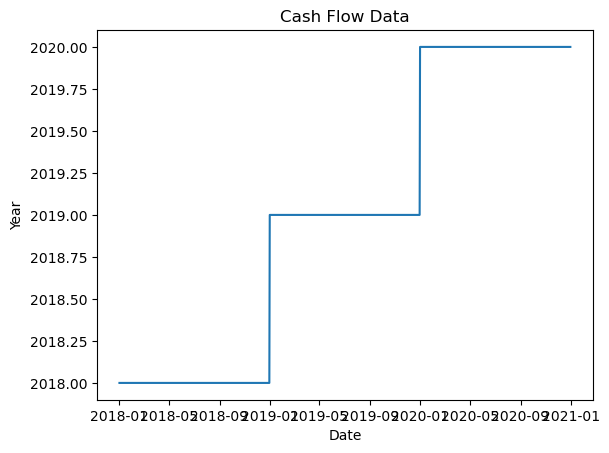

In [38]:
plt.plot(calendar_data['Date'], calendar_data['Year'])
plt.xlabel('Date')
plt.ylabel('Year')
plt.title('Cash Flow Data')
plt.show()